In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
import parent
import torch.nn.functional as F
from mermaidlite import compute_warped_image_multiNC, identity_map_multiN
import torch
import random
import inverseConsistentNet
import networks
import data
import matplotlib.pyplot as plt
import numpy as np

mermaid unavailable, no LNCC


In [4]:
_, medresknees = data.get_knees_dataset()

In [131]:

BATCH_SIZE = 24
SCALE = 1  # 1 IS QUARTER RES, 2 IS HALF RES, 4 IS FULL RES
working_shape = [BATCH_SIZE, 1, 40 * SCALE, 96 * SCALE, 96 * SCALE]

net = inverseConsistentNet.InverseConsistentAffineDeformableNet(
    networks.ConvolutionalMatrixNet(dimension=3),
    networks.tallUNet2(dimension=3),
    lmbda=100,
    input_shape=working_shape,
)

net.load_state_dict(torch.load("../results/aff_aff_def_knee_frozen_affine/knee_aligner_resi_net12000"))

/playpen-raid1/tgreer/InverseConsistency/networks.py:390: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array([[2, 16, 32, 64, 256, 512], [16, 32, 64, 128, 256]]),


<All keys matched successfully>

In [105]:
net.adjust_batch_size(BATCH_SIZE)
net.load_state_dict(torch.load("../results/ttsplit_affine_deformable2/knee_aligner_resi_net27900"))
net.adjust_batch_size(BATCH_SIZE//8)

In [132]:
net.cuda()

InverseConsistentAffineDeformableNet(
  (affine_regis_net): ConvolutionalMatrixNet(
    (convs): ModuleList(
      (0): Conv3d(2, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (1): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (2): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (3): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (4): Conv3d(128, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (5): Conv3d(256, 512, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (dense2): Linear(in_features=512, out_features=300, bias=True)
    (dense3): Linear(in_features=300, out_features=12, bias=True)
  )
  (regis_net): UNet2(
    (downConvs): ModuleList(
      (0): Conv3d(2, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
      (1): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
      

In [133]:
def make_batch():
    image = torch.cat([random.choice(medresknees) for _ in range(BATCH_SIZE)])
    image = image[:, None]
    image = image.cuda()
    return image

In [134]:
moving_image, fixed_image = make_batch(), make_batch()

In [135]:
net(moving_image, fixed_image)

[tensor(0.0226, device='cuda:0', grad_fn=<AddBackward0>),
 tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(0.0207, device='cuda:0', grad_fn=<AddBackward0>),
 tensor(0.2345, device='cuda:0', grad_fn=<MulBackward0>)]

In [136]:
import matplotlib.pyplot as plt

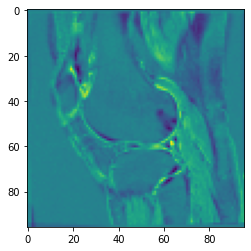

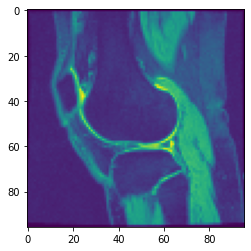

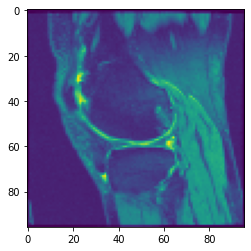

In [137]:
N += 1
N %= 3
plt.imshow(fixed_image[N, 0, 10].cpu() - net.warped_image_A[N, 0, 10].cpu().detach())
plt.show()
plt.imshow(fixed_image[N, 0, 10].cpu().detach())
plt.show()
plt.imshow(moving_image[N, 0, 10].cpu().detach())

In [1]:
N += 1
N %= 3
#plt.imshow(fixed_image[N, 0, 10].cpu() - net.warped_image_A[N, 0, 10].cpu().detach())
#plt.show()

plt.imshow(moving_image[N, 0, 10].cpu().detach())
plt.show()
plt.imshow(net.warped_image_A[N, 0, 10].cpu().detach() - fixed_image[N, 0, 10].cpu().detach())
plt.show()
plt.imshow(net.affine_warped_image_A[N, 0, 10].cpu().detach() - fixed_image[N, 0, 10].cpu().detach())
plt.show()
plt.imshow(fixed_image[N, 0, 10].cpu().detach())
plt.show()

NameError: name 'N' is not defined

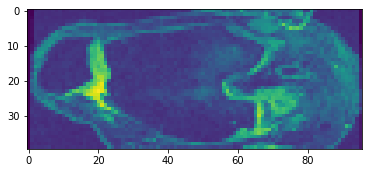

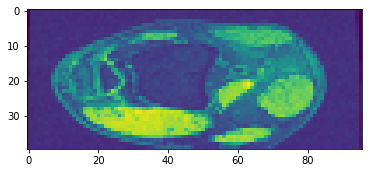

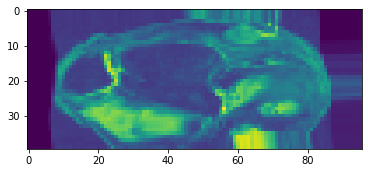

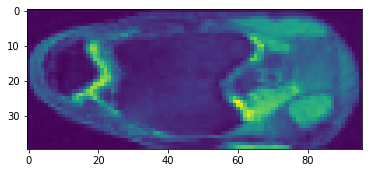

In [110]:
import matplotlib.pyplot as plt
N = 2
plt.imshow(moving_image[N, 0, :, 20].cpu())
plt.show()
plt.imshow(fixed_image[N, 0, :, 20].cpu())
plt.show()
plt.imshow(net.warped_image_A[N, 0, :, 20].cpu().detach())
plt.show()
plt.imshow(net.warped_image_B[N, 0, :, 20].cpu().detach())

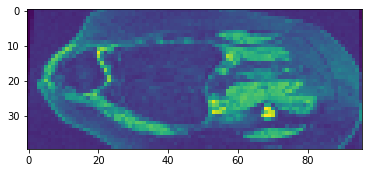

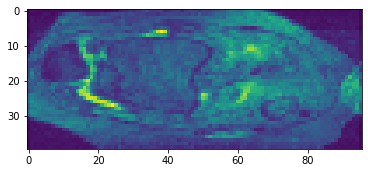

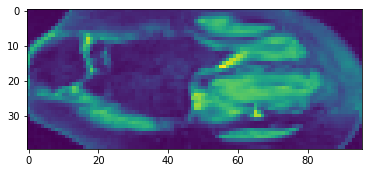

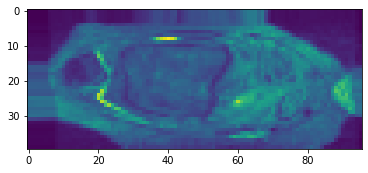

In [51]:
import matplotlib.pyplot as plt
N = 2
plt.imshow(moving_image[N, 0, :, 20].cpu())
plt.show()
plt.imshow(fixed_image[N, 0, :, 20].cpu())
plt.show()
plt.imshow(net.warped_image_A[N, 0, :, 20].cpu().detach())
plt.show()
plt.imshow(net.warped_image_B[N, 0, :, 20].cpu().detach())

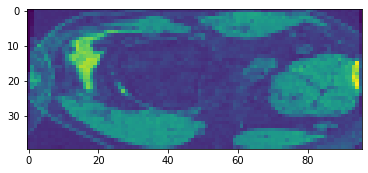

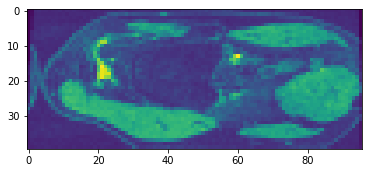

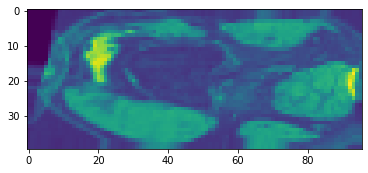

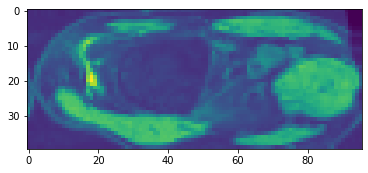

In [111]:
import matplotlib.pyplot as plt
plt.imshow(moving_image[0, 0, :, 10].cpu())
plt.show()
plt.imshow(fixed_image[0, 0, :, 10].cpu())
plt.show()
plt.imshow(net.warped_image_A[0, 0, :, 10].cpu().detach())
plt.show()
plt.imshow(net.warped_image_B[0, 0, :, 10].cpu().detach())

In [179]:
net.matrix_AB[22].cpu().detach().numpy()

array([[ 0.8921268 ,  0.01366304, -0.02698795, -0.00230147],
       [-0.02714648,  0.8886366 ,  0.04763453, -0.02069031],
       [-0.02109941, -0.01767839,  0.9114483 ,  0.10829491],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)

In [180]:
import numpy as np
np.set_printoptions(suppress=True)

In [181]:
len(list(net.parameters()))

48

In [182]:
next(net.parameters()).requires_grad

True

In [183]:
len(list(net.affine_regis_net.parameters()))

16

In [52]:
import visualize

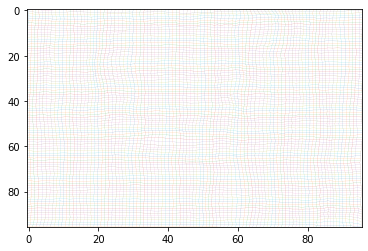

In [112]:
visualize.show_as_grid((net.approximate_zero + net.identityMap)[2, [1, 2], 20])

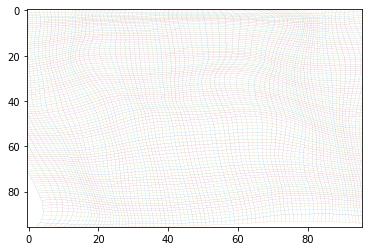

In [113]:
visualize.show_as_grid(net.phi_AB[2, [1, 2], 20])

In [80]:
import pickle
with open("/playpen/tgreer/cartilage_uint8s.trch", "rb") as f:
    cartilage = torch.load(f)

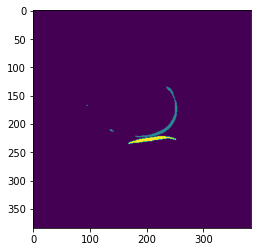

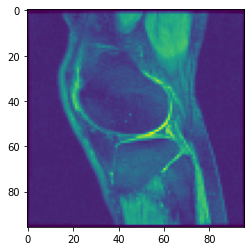

In [81]:
N = 1
plt.imshow(cartilage[N][0, 40])
plt.show()
plt.imshow(medresknees[N][0, 10])



In [82]:
net.adjust_batch_size(BATCH_SIZE // 8)
net.cuda()

InverseConsistentAffineDeformableNet(
  (affine_regis_net): ConvolutionalMatrixNet(
    (convs): ModuleList(
      (0): Conv3d(2, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (1): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (2): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (3): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (4): Conv3d(128, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (5): Conv3d(256, 512, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (dense2): Linear(in_features=512, out_features=300, bias=True)
    (dense3): Linear(in_features=300, out_features=12, bias=True)
  )
  (regis_net): UNet2(
    (downConvs): ModuleList(
      (0): Conv3d(2, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
      (1): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
      

In [83]:
def make_test_batch():
    index = [random.randint(0, 240 - 1) for _ in range(BATCH_SIZE// 8)]
    image = torch.cat([medresknees[index[_]] for _ in range(BATCH_SIZE // 8)])
    image = image.reshape(BATCH_SIZE // 8, 1, 40 * SCALE, 96 * SCALE, 96 * SCALE)
    image = image.cuda()
    #print(image.shape)
    cartilage_batch = torch.cat([cartilage[index[_]][None, :, :, :, :] for _ in range(BATCH_SIZE // 8)])
    #cartilage_batch = cartilage_batch[:, None, :]
    #print(cartilage_batch.shape)
    cartilage_batch = cartilage_batch.cuda()
    return image, cartilage_batch

fixed_image, fixed_cartilage = make_test_batch()
moving_image, moving_cartilage = make_test_batch()


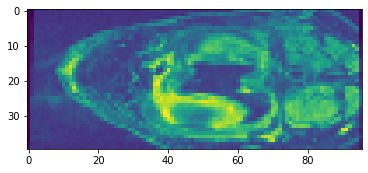

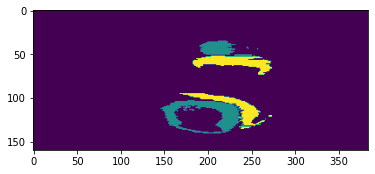

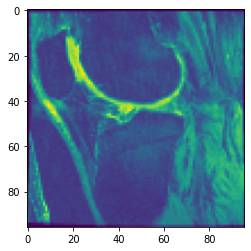

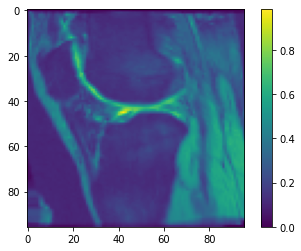

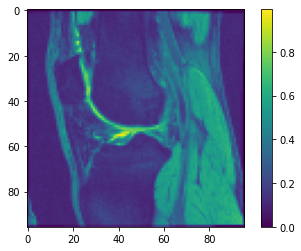

In [114]:
net(moving_image, fixed_image)

#N +=1
N %= 3
S =46
plt.imshow(moving_image[N, 0, :, S].cpu())
plt.show()
plt.imshow(moving_cartilage[N, 0, :, S * 4].cpu())
plt.show()

plt.imshow(moving_image[N, 0, 16].detach().cpu())
plt.show()
plt.imshow(net.warped_image_B[N, 0, 16].detach().cpu())
plt.colorbar()
plt.show()
plt.imshow(fixed_image[N, 0, 16].cpu())
plt.colorbar()
plt.show()


In [115]:
fat_phi = torch.nn.Upsample(size=moving_cartilage.size()[2:], mode="trilinear")(net.phi_AB[:, :3])
sz = np.array(fat_phi.size())
spacing = 1./(sz[2::]-1) 
warped_moving_cartilage = compute_warped_image_multiNC(moving_cartilage.float(), fat_phi, spacing, 1)

def flips(phi):
    a = phi[:, :, 1:, 1:, 1:] - phi[:, :, :-1, 1:, 1:]
    b = phi[:, :, 1:, 1:, 1:] - phi[:, :, 1:, :-1, 1:]
    c = phi[:, :, 1:, 1:, 1:] - phi[:, :, 1:, 1:, :-1]

    dV = torch.sum(torch.cross(a, b, 1) * c, axis=1, keepdims=True)
    return torch.sum(dV < 0) / 3

flips(net.phi_AB[:, :3])

flips(fat_phi[:, :, ::2, ::2, ::2])

/playpen-raid1/tgreer/anaconda3/envs/mermaid5/lib/python3.7/site-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


tensor(0., device='cuda:0')

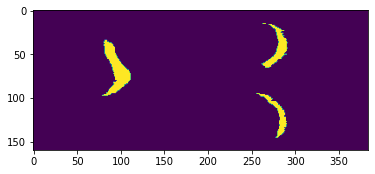

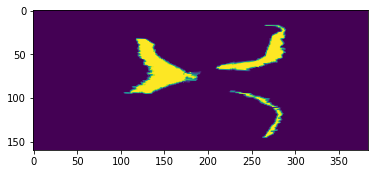

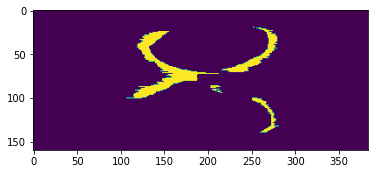

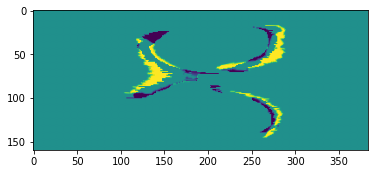

In [116]:
N +=1
N %= 3
plt.imshow(moving_cartilage[N, 0, :, S * 4].cpu())
plt.show() 
plt.imshow(warped_moving_cartilage[N, 0, :, S * 4].detach().cpu())
plt.show()

plt.imshow(fixed_cartilage[N, 0, :, S * 4].cpu())
plt.show()

plt.imshow(warped_moving_cartilage[N, 0, :, S * 4].detach().cpu() - fixed_cartilage[N, 0, :, S * 4].cpu())
plt.show()

In [117]:

dices = []
for _ in range(70):
    fixed_image, fixed_cartilage = make_test_batch()
    moving_image, moving_cartilage = make_test_batch()
    print(fixed_image.shape, moving_image.shape, fixed_cartilage.shape, moving_cartilage.shape)
    net(moving_image, fixed_image)
    fat_phi = torch.nn.Upsample(size=moving_cartilage.size()[2:], mode="trilinear")(net.phi_AB[:, :3])
    sz = np.array(fat_phi.size())
    spacing = 1./(sz[2::]-1) 
    warped_moving_cartilage = compute_warped_image_multiNC(moving_cartilage.float(), fat_phi, spacing, 1)
    wmb = warped_moving_cartilage > .5
    fb = fixed_cartilage > .5
    intersection = wmb * fb
    d = 2 * torch.sum(intersection).float() / (torch.sum(wmb) + torch.sum(fb))
    print(d)
    dices.append(d)


torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 160, 384, 384]) torch.Size([3, 1, 160, 384, 384])
tensor(0.5208, device='cuda:0')
torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 160, 384, 384]) torch.Size([3, 1, 160, 384, 384])
tensor(0.5424, device='cuda:0')
torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 160, 384, 384]) torch.Size([3, 1, 160, 384, 384])
tensor(0.5153, device='cuda:0')
torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 160, 384, 384]) torch.Size([3, 1, 160, 384, 384])
tensor(0.5218, device='cuda:0')
torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 160, 384, 384]) torch.Size([3, 1, 160, 384, 384])
tensor(0.5557, device='cuda:0')
torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 160, 384, 384]) torch.Size([3, 1, 160, 384, 384])
tensor(0.5283, device='cuda:0')
torch.Size([3, 1, 40, 96, 96

tensor(0.3899, device='cuda:0')
torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 160, 384, 384]) torch.Size([3, 1, 160, 384, 384])
tensor(0.5705, device='cuda:0')
torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 160, 384, 384]) torch.Size([3, 1, 160, 384, 384])
tensor(0.4879, device='cuda:0')
torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 160, 384, 384]) torch.Size([3, 1, 160, 384, 384])
tensor(0.6158, device='cuda:0')
torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 160, 384, 384]) torch.Size([3, 1, 160, 384, 384])
tensor(0.5955, device='cuda:0')
torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 160, 384, 384]) torch.Size([3, 1, 160, 384, 384])
tensor(0.6158, device='cuda:0')
torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 40, 96, 96]) torch.Size([3, 1, 160, 384, 384]) torch.Size([3, 1, 160, 384, 384])
tensor(0.5411, device='cuda:

In [118]:
np.mean([d.item() for d in dices])

0.5331051055874143

In [64]:
import os
files = os.listdir("../results/aff_aff_def_knee_frozen_affine/")
files = os.listdir("../results/ttsplit_affine_deformable2/")
files = [f for f in files if "_net" in f]
files

['knee_aligner_resi_net0',
 'knee_aligner_resi_net300',
 'knee_aligner_resi_net600',
 'knee_aligner_resi_net900',
 'knee_aligner_resi_net1200',
 'knee_aligner_resi_net1500',
 'knee_aligner_resi_net1800',
 'knee_aligner_resi_net2100',
 'knee_aligner_resi_net2400',
 'knee_aligner_resi_net2700',
 'knee_aligner_resi_net3000',
 'knee_aligner_resi_net3300',
 'knee_aligner_resi_net3600',
 'knee_aligner_resi_net3900',
 'knee_aligner_resi_net4200',
 'knee_aligner_resi_net4500',
 'knee_aligner_resi_net4800',
 'knee_aligner_resi_net5100',
 'knee_aligner_resi_net5400',
 'knee_aligner_resi_net5700',
 'knee_aligner_resi_net6000',
 'knee_aligner_resi_net6300',
 'knee_aligner_resi_net6600',
 'knee_aligner_resi_net6900',
 'knee_aligner_resi_net7200',
 'knee_aligner_resi_net7500',
 'knee_aligner_resi_net7800',
 'knee_aligner_resi_net8100',
 'knee_aligner_resi_net8400',
 'knee_aligner_resi_net8700',
 'knee_aligner_resi_net9000',
 'knee_aligner_resi_net9300',
 'knee_aligner_resi_net9600',
 'knee_aligner_r

In [67]:
diceHistory = []
for f in files[len(diceHistory):]:
    net.adjust_batch_size(BATCH_SIZE)
    net.load_state_dict(torch.load("../results/ttsplit_affine_deformable2/" + f))
    net.adjust_batch_size(BATCH_SIZE // 8)
    net.cuda()
    dices = []
    for _ in range(20):
        fixed_image, fixed_cartilage = make_test_batch()
        moving_image, moving_cartilage = make_test_batch()
        net(moving_image, fixed_image)
        fat_phi = torch.nn.Upsample(size=moving_cartilage.size()[2:], mode="trilinear")(net.phi_AB[:, :3])
        sz = np.array(fat_phi.size())
        spacing = 1./(sz[2::]-1) 
        warped_moving_cartilage = compute_warped_image_multiNC(moving_cartilage.float(), fat_phi, spacing, 1)
        wmb = warped_moving_cartilage > .5
        fb = fixed_cartilage > .5
        intersection = wmb * fb
        d = 2 * torch.sum(intersection).float() / (torch.sum(wmb) + torch.sum(fb))
        #print(d)
        dices.append(d)
    dd = np.mean([d.item() for d in dices])
    print(dd)
    diceHistory.append(dd)

0.20840784423053266
0.21702447831630706
0.35091996416449545
0.34470264837145803
0.30916259735822677
0.3721349358558655
0.3936117239296436
0.42619949132204055
0.4129720374941826
0.43820719569921496
0.4387608289718628
0.4698243707418442
0.4285453513264656
0.46633694022893907
0.4504993721842766
0.47683627903461456
0.4757689654827118
0.4568514361977577
0.46230281591415406
0.49281696379184725


KeyboardInterrupt: 

In [284]:
cartilage[0].int8

AttributeError: 'Tensor' object has no attribute 'int8'

In [286]:
cartilage[0].type(torch.ByteTensor)

tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         ...,

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 

In [287]:
compressed_cart = [c.type(torch.ByteTensor) for c in cartilage]

In [289]:
torch.save(compressed_cart, "/playpen/tgreer/cartilage_uint8s.trch")

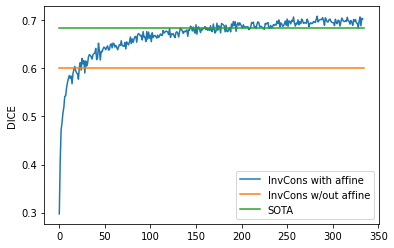

In [210]:
plt.plot(diceHistory, label="InvCons with affine")
plt.plot([0, len(diceHistory)], [.60, .60], label="InvCons w/out affine")
plt.plot([0, len(diceHistory)], [.684, .684], label="SOTA")
plt.ylabel("DICE")
plt.legend()

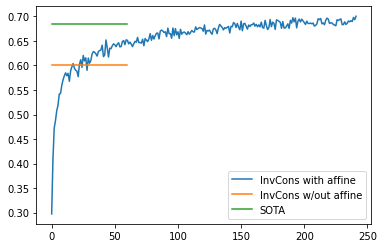

In [172]:
plt.plot(diceHistory, label="InvCons with affine")
plt.plot([0, 60], [.60, .60], label="InvCons w/out affine")
plt.plot([0, 60], [.684, .684], label="SOTA")
plt.legend()

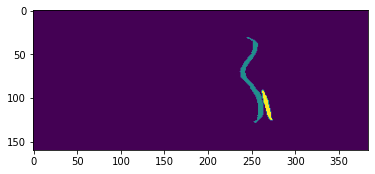

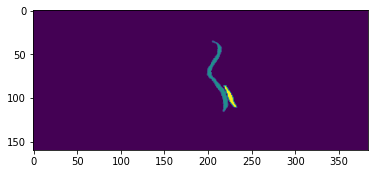

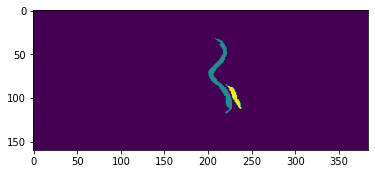

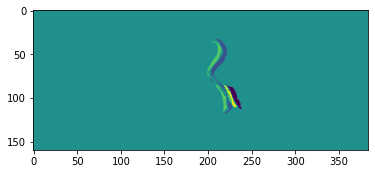

In [89]:
N =0
S = 40
plt.imshow(moving_cartilage[N, 0, :, :, S * 4].cpu())
plt.show() 
plt.imshow(warped_moving_cartilage[N, 0, :,:, S * 4].detach().cpu())
plt.show()

plt.imshow(fixed_cartilage[N, 0, :,:, S * 4].cpu())
plt.show()

plt.imshow(warped_moving_cartilage[N, 0, :,:, S * 4].detach().cpu() - fixed_cartilage[N, 0, :,:, S * 4].cpu())
plt.show()



In [177]:
ds = np.array([d.item() for d in dices])

In [182]:
np.sqrt(np.mean((ds - np.mean(ds))**2))

0.04226305800018859

In [216]:
np.mean(diceHistory[-50:])

0.6975856225149971

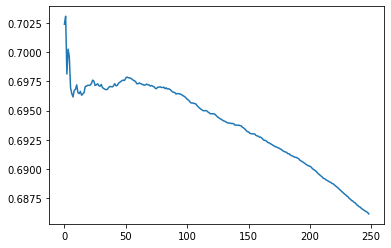

In [223]:
plt.plot([np.mean(diceHistory[-j:]) for j in range(1, 250)])

In [219]:
diceHistory[-1]

0.7024069011211396

In [222]:
diceHistory[-2:]

[0.7037748192037855, 0.7024069011211396]

In [224]:
len(cartilage)

240

In [24]:
r_ds = torch.load("/playpen/tgreer/knees_test_set")

In [25]:
len(r_ds)

301

In [26]:
batched_ds = list(zip(r_ds[::3], r_ds[1::3], r_ds[2::3]))

In [27]:
batched_ds[0]
x = list(zip(*batched_ds[0]))
x = [torch.cat(r, 0) for r in x]

In [28]:
net(x[0].cuda(), x[1].cuda())

[tensor(0.0348, device='cuda:0', grad_fn=<AddBackward0>),
 tensor(0.0104, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(0.0244, device='cuda:0', grad_fn=<AddBackward0>),
 tensor(0.2879, device='cuda:0', grad_fn=<MulBackward0>)]

In [119]:
dices = []
for x in batched_ds:
    x = list(zip(*x))
    x = [torch.cat(r, 0).cuda().float() for r in x]
    fixed_image, fixed_cartilage = x[0], x[2]
    moving_image, moving_cartilage = x[1], x[3]
    
    net(moving_image, fixed_image)
    fat_phi = torch.nn.Upsample(size=moving_cartilage.size()[2:], mode="trilinear")(net.phi_AB[:, :3])
    sz = np.array(fat_phi.size())
    spacing = 1./(sz[2::]-1) 
    warped_moving_cartilage = compute_warped_image_multiNC(moving_cartilage.float(), fat_phi, spacing, 1)
    wmb = warped_moving_cartilage > .5
    fb = fixed_cartilage > .5
    intersection = wmb * fb
    d = 2 * torch.sum(intersection).float() / (torch.sum(wmb) + torch.sum(fb))
    print(d)
    dices.append(d)
dd = np.mean([d.item() for d in dices])
print(dd)

tensor(0.5554, device='cuda:0')
tensor(0.4578, device='cuda:0')
tensor(0.5640, device='cuda:0')
tensor(0.6089, device='cuda:0')
tensor(0.5105, device='cuda:0')
tensor(0.4825, device='cuda:0')
tensor(0.4709, device='cuda:0')
tensor(0.3318, device='cuda:0')
tensor(0.5517, device='cuda:0')
tensor(0.5016, device='cuda:0')
tensor(0.4987, device='cuda:0')
tensor(0.3926, device='cuda:0')
tensor(0.4382, device='cuda:0')
tensor(0.5358, device='cuda:0')
tensor(0.3762, device='cuda:0')
tensor(0.5262, device='cuda:0')
tensor(0.4102, device='cuda:0')
tensor(0.4426, device='cuda:0')
tensor(0.4490, device='cuda:0')
tensor(0.4805, device='cuda:0')
tensor(0.5558, device='cuda:0')
tensor(0.5055, device='cuda:0')
tensor(0.4649, device='cuda:0')
tensor(0.5695, device='cuda:0')
tensor(0.5307, device='cuda:0')
tensor(0.4814, device='cuda:0')
tensor(0.5191, device='cuda:0')
tensor(0.3862, device='cuda:0')
tensor(0.4528, device='cuda:0')
tensor(0.5250, device='cuda:0')
tensor(0.5548, device='cuda:0')
tensor(0

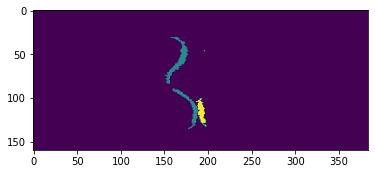

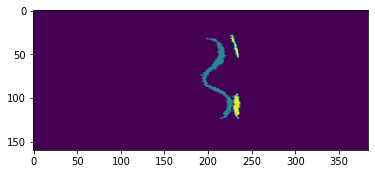

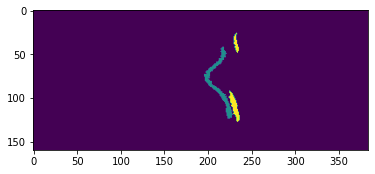

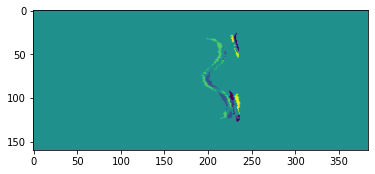

In [120]:
N = 2
S = 40
plt.imshow(moving_cartilage[N, 0, :, :, S * 4].cpu())
plt.show() 
plt.imshow(warped_moving_cartilage[N, 0, :,:, S * 4].detach().cpu())
plt.show()

plt.imshow(fixed_cartilage[N, 0, :,:, S * 4].cpu())
plt.show()

plt.imshow(warped_moving_cartilage[N, 0, :,:, S * 4].detach().cpu() - fixed_cartilage[N, 0, :,:, S * 4].cpu())
plt.show()


In [354]:
fixed_image.max()

tensor(0.9999, device='cuda:0')

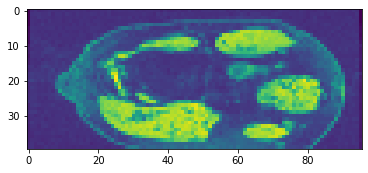

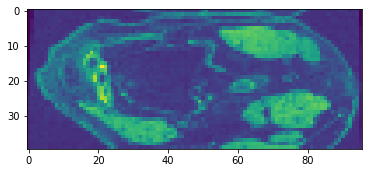

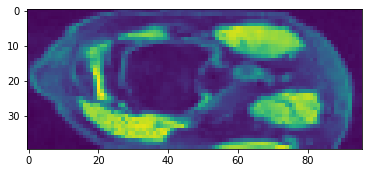

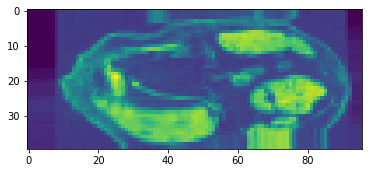

In [121]:
import matplotlib.pyplot as plt
plt.imshow(moving_image[1, 0, :, 10].cpu())
plt.show()
plt.imshow(fixed_image[1, 0, :, 10].cpu())
plt.show()
plt.imshow(net.warped_image_A[1, 0, :, 10].cpu().detach())
plt.show()
plt.imshow(net.warped_image_B[1, 0, :, 10].cpu().detach())

In [279]:
net.cuda()

InverseConsistentAffineDeformableNet(
  (affine_regis_net): ConvolutionalMatrixNet(
    (convs): ModuleList(
      (0): Conv3d(2, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (1): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (2): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (3): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (4): Conv3d(128, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (5): Conv3d(256, 512, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (dense2): Linear(in_features=512, out_features=300, bias=True)
    (dense3): Linear(in_features=300, out_features=12, bias=True)
  )
  (regis_net): UNet2(
    (downConvs): ModuleList(
      (0): Conv3d(2, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
      (1): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
      

In [291]:
np.array(moving_image[0].cpu())

array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.02377473, 0.0200652 , ..., 0.02636016,
          0.02141412, 0.        ],
         ...,
         [0.        , 0.06975044, 0.09543616, ..., 0.0858251 ,
          0.04361511, 0.        ],
         [0.        , 0.03608363, 0.04316547, ..., 0.04580711,
          0.02709083, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.0033723 , 0.02079586, 0.02073966, ..., 0.02529226,
          0.02489883, 0.        ],
         ...,
         [0.        , 0.05957733, 0.07818121, ..., 0.09206384,
          0.04569469, 0. 

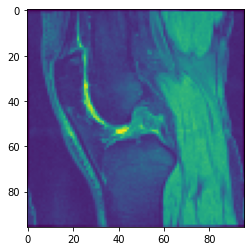

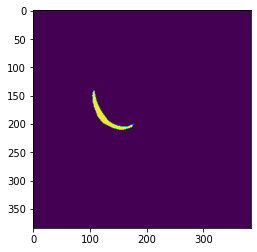

In [298]:
plt.imshow(moving_image[1, 0, 20].cpu())
plt.show()
plt.imshow(moving_cartilage[1, 0, 80].cpu())

In [319]:
moving_image.shape

torch.Size([3, 1, 40, 96, 96])

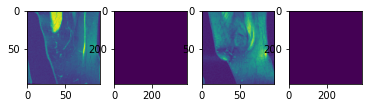

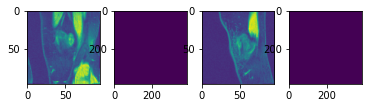

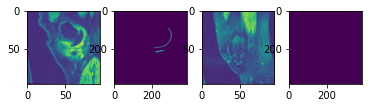

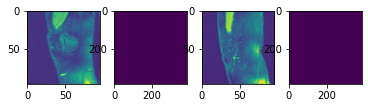

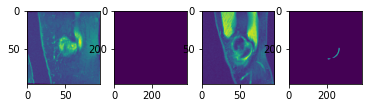

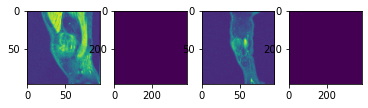

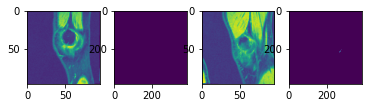

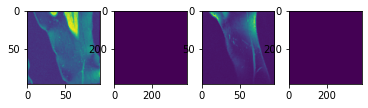

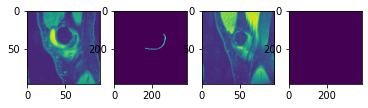

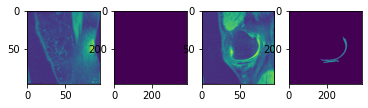

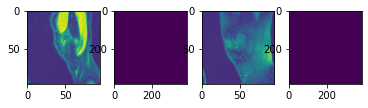

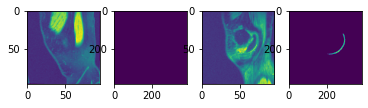

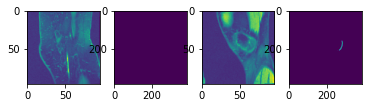

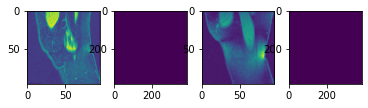

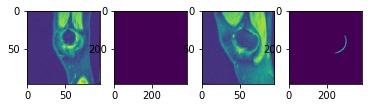

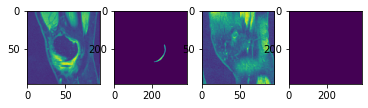

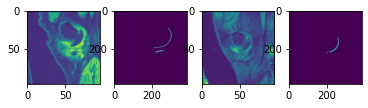

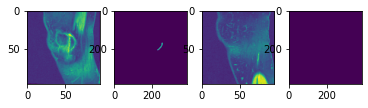

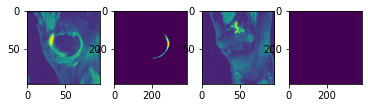

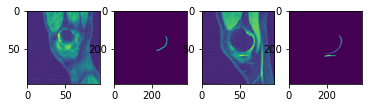

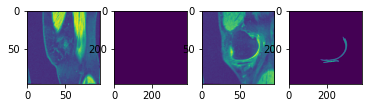

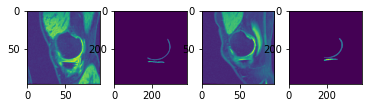

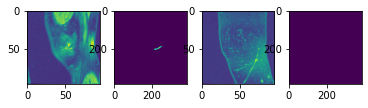

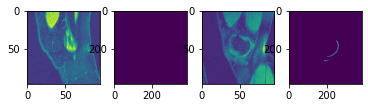

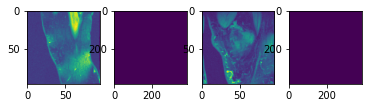

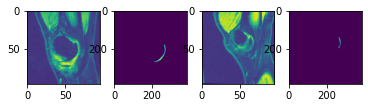

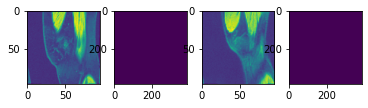

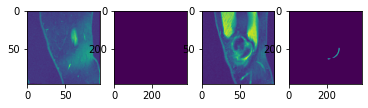

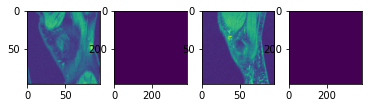

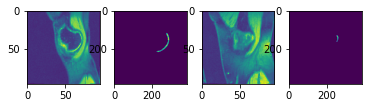

In [351]:
for i in range(30):
    ax = plt.gca()

    
    idx = np.random.randint(len(r_ds))
    plt.subplot(1, 4, 1)
    plt.imshow(r_ds[idx][0][0, 0,  35])
    plt.subplot(1, 4, 2)
    plt.imshow(r_ds[idx][2][0, 0, 140])
    
    idx = np.random.randint(len(medresknees))
    plt.subplot(1, 4, 3)
    plt.imshow(medresknees[idx][0,35])
    plt.subplot(1, 4, 4)
    plt.imshow(cartilage[idx][0, 140])
    plt.show()

In [42]:
net.identityMapProjective.shape

torch.Size([8, 4, 40, 96, 96])

In [43]:
net.identityMap.shape

torch.Size([8, 3, 40, 96, 96])

In [44]:
moving_cartilage.shape

torch.Size([3, 1, 160, 384, 384])

In [72]:
net.state_dict().keys()

odict_keys(['identityMap', 'identityMapProjective', 'affine_regis_net.convs.0.weight', 'affine_regis_net.convs.0.bias', 'affine_regis_net.convs.1.weight', 'affine_regis_net.convs.1.bias', 'affine_regis_net.convs.2.weight', 'affine_regis_net.convs.2.bias', 'affine_regis_net.convs.3.weight', 'affine_regis_net.convs.3.bias', 'affine_regis_net.convs.4.weight', 'affine_regis_net.convs.4.bias', 'affine_regis_net.convs.5.weight', 'affine_regis_net.convs.5.bias', 'affine_regis_net.dense2.weight', 'affine_regis_net.dense2.bias', 'affine_regis_net.dense3.weight', 'affine_regis_net.dense3.bias', 'regis_net.downConvs.0.weight', 'regis_net.downConvs.0.bias', 'regis_net.downConvs.1.weight', 'regis_net.downConvs.1.bias', 'regis_net.downConvs.2.weight', 'regis_net.downConvs.2.bias', 'regis_net.downConvs.3.weight', 'regis_net.downConvs.3.bias', 'regis_net.downConvs.4.weight', 'regis_net.downConvs.4.bias', 'regis_net.upConvs.0.weight', 'regis_net.upConvs.0.bias', 'regis_net.upConvs.1.weight', 'regis_net

In [122]:
net_old = inverseConsistentNet?

In [ ]:
net_old = inverseConsistentNet